<a href="https://colab.research.google.com/github/dgvsnl/MNIST-LogisticRegression/blob/master/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [43]:
mnist = fetch_openml("mnist_784")

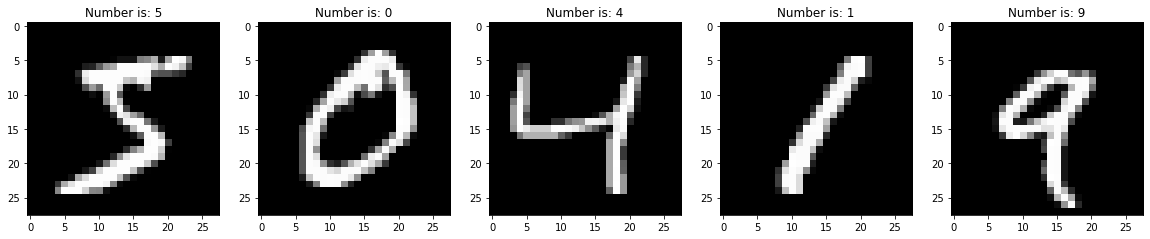

In [44]:
plt.figure(figsize = (20,4))
for index,(image,label) in enumerate(zip(mnist.data[:5],mnist.target[:5])):
  plt.subplot(1,5,index + 1)
  image = np.reshape(image, (28,28))
  plt.imshow(image, cmap = 'gray') 
  plt.title("Number is: %s" % label)

In [45]:
 x_train,x_test,y_train,y_test = train_test_split(mnist.data,mnist.target, test_size = 0.2)
 len(x_test)/len(x_train)

0.25

In [46]:
mdl = LogisticRegression(solver = "lbfgs")
mdl.fit(x_train,y_train)
prediction = mdl.predict(x_test)
score = mdl.score(x_test,y_test)
print(score)

0.9207857142857143


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


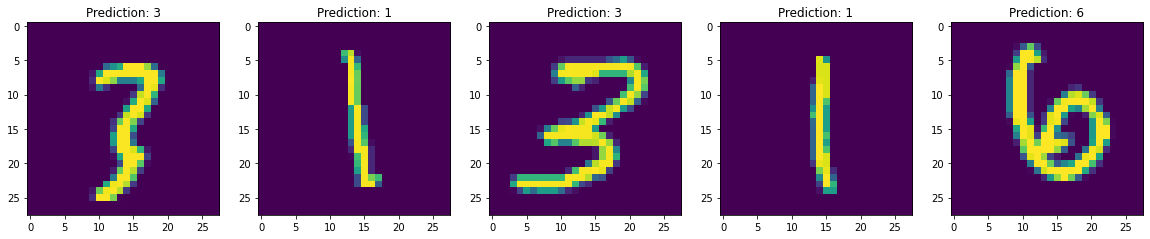

In [55]:
#Prediction
plt.figure(figsize = (20,4))
for index in range(5):
  plt.subplot(1,5, index + 1)
  plt.imshow(np.reshape(x_test[index], (28,28)))
  plt.title("Prediction: " + mdl.predict([x_test[index]])[0])

In [48]:
confusion = metrics.confusion_matrix(y_test,prediction)
confusion

array([[1285,    0,    3,    1,    3,    9,   13,    3,   10,    0],
       [   0, 1501,    6,    3,    3,    7,    0,    0,    8,    5],
       [   5,   16, 1211,   36,   20,    5,   17,   18,   41,   10],
       [   2,    4,   33, 1292,    2,   36,    3,   12,   33,   12],
       [   4,    2,    6,    5, 1284,    2,   13,    2,    6,   47],
       [  15,    7,   12,   47,   11, 1122,   22,    6,   44,   19],
       [  10,    2,   16,    1,   11,   21, 1316,    2,    3,    0],
       [   6,    4,   19,    5,   10,    2,    0, 1426,    3,   59],
       [   9,   22,   13,   38,    7,   33,   10,    9, 1214,   18],
       [   6,    4,    1,   19,   45,   11,    1,   27,   13, 1240]])

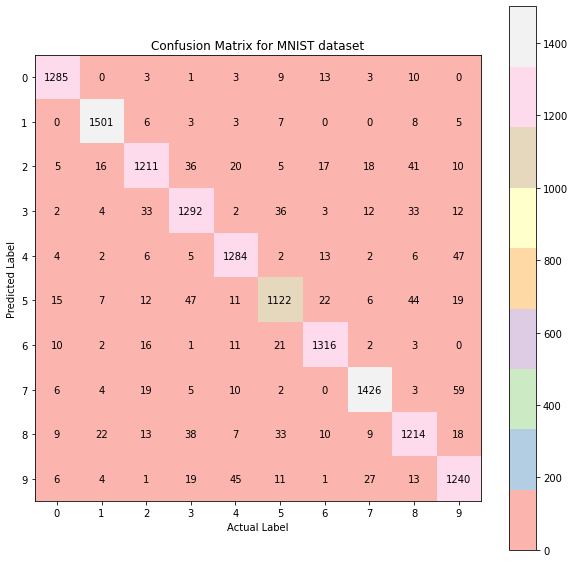

In [56]:
#Beautifying confusion matrix with matplotlib

plt.figure(figsize = (10,10)) 
plt.imshow(confusion, cmap = 'Pastel1')
plt.title("Confusion Matrix for MNIST dataset")

plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

plt.colorbar()

plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")

width,height = confusion.shape
for x in range(width):
  for y in range(height):
    plt.annotate(str(confusion[x][y]), xy = (y,x), verticalalignment = 'center', horizontalalignment = 'center')